In [1]:
#A scratch book
import Spectrum_mol as Spec
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.signal import find_peaks

In [2]:
def normalize_spec(xaxis, yaxis):
    """
    This function takes in spec and return the normalized spec
    numerically calculate the AUC and then normalize
    WARNING:
    FIX THE UNIT BEFORE NORMALIZATION!!!
    
    input:
    x-axis (in what unit??)
    y-axis (absorption, dimensionless)
    
    output:
    x-axis (same as input unit)
    y-axis (absorption)
    
    """
    #Calculate the total AUC
    #yaxis = yaxis - min(yaxis)
    
    AUC = 0
    for index in range(1, len(xaxis)):
        AUC += yaxis[index] * (xaxis[index]-xaxis[index-1])
    
    #print("AUC is %s" %AUC)
    
    #Calculate the normalization factor, use this to multiply the Absorption to get normalized spec
    norm_factor = 1/AUC
    
    #Reassign the value in yaxis
    new_yaxis = []
    for index in range(0, len(xaxis)):
        new_yaxis.append(yaxis[index]*norm_factor)
    #print(np.array(new_yaxis).shape)
    #print(xaxis.shape)
    
    
    return (xaxis, np.array(new_yaxis))
    

In [3]:
def fix_periodicity(xaxis, yaxis):
    """
    This function is to find the minimum of yaxis, locate its index and re-arrange the numpy array. Let it start from minimum.
    no longer need.
    """
    minimum = np.amin(yaxis)
    minimum_index = np.where(yaxis == np.amin(yaxis))[0][0]
    
    maximum = np.amax(yaxis)
    maximum_index = np.where(yaxis == np.amax(yaxis))[0][0]
    
    new_xaxis = []
    new_yaxis = []
    
    #print("The minimum was at %s (current unit) on xaxis, its original index is %s" %(xaxis[minimum_index], minimum_index))
    #print("The maximum was at %s (current unit) on xaxis, its original index is %s" %(xaxis[maximum_index], maximum_index))
    
    for i in range(minimum_index, yaxis.size):
        new_xaxis.append(xaxis[i])
        new_yaxis.append(yaxis[i])
    
    for i in range(0, minimum_index):
        new_xaxis.append(xaxis[i])
        new_yaxis.append(yaxis[i])
    
    return(np.array(xaxis), np.array(new_yaxis))

In [4]:
def calibrate_00peak_fluorescence(xaxis, yaxis, peak_energy):
    #peak_energy comes in cm^-1
    peaks,_ = find_peaks(fixed_Fw_responsey, height=0) #this returns the index of peaks found in the y array. The second is the 0-0 for fluorescence spectrum. The first is the 0-0 for absorption.
    xdiff = peak_energy - xaxis[peaks[1]]
    xaxis = xaxis + xdiff          
    return xaxis, yaxis

def calibrate_00peak_absorption(xaxis, yaxis, peak_energy):
    #peak_energy comes in cm^-1
    peaks,_ = find_peaks(fixed_Fw_responsey, height=0) #this returns the index of peaks found in the y array. The second is the 0-0 for fluorescence spectrum. The first is the 0-0 for absorption.
    xdiff = peak_energy - xaxis[peaks[0]]
    xaxis = xaxis + xdiff
    return xaxis, yaxis

In [5]:
def calibrate_00peak_fluorescence(xaxis, yaxis, peak_energy, reorganization_energy):
    #peak_energy comes in cm^-1
    peaks,_ = find_peaks(yaxis, height=0) #this returns the index of peaks found in the y array. The second is the 0-0 for fluorescence spectrum. The first is the 0-0 for absorption.
    xdiff = peak_energy - xaxis[peaks[1]]
    xaxis = xaxis + xdiff - reorganization_energy*2
    #print(xdiff)
    return xaxis, yaxis

def calibrate_00peak_absorption(xaxis, yaxis, peak_energy):
    #peak_energy and reorganization_energy come in cm^-1
    
    peaks,_ = find_peaks(yaxis, height=0) #this returns the index of peaks found in the y array. The second is the 0-0 for fluorescence spectrum. The first is the 0-0 for absorption.
    
    #plt.plot(xaxis,yaxis)
    #plt.plot(xaxis[peaks], yaxis[peaks], "x")
    
    xdiff = peak_energy - xaxis[peaks[0]]
    #print(xdiff)
    xaxis = xaxis + xdiff
    
    return xaxis, yaxis

In [6]:
def generate_spec_renger(peakenergy, reorganization_energy):
    Fw_response = np.load("./RENGER_Fw(0, 1.0, 0.001).npy")
    Aw_response = np.load("./RENGER_Aw(0, 1.0, 0.001).npy")
    #here we clean up fluorescence spec
    fixed_Fw_responsex, fixed_Fw_responsey = fix_periodicity(Fw_response[0],Fw_response[1])
    normed_Fw_responsex, normed_Fw_responsey = normalize_spec(fixed_Fw_responsex, fixed_Fw_responsey)
    
    cal_Fw_responsex = normed_Fw_responsex + (peakenergy - normed_Fw_responsex[np.argmax(normed_Fw_responsey)]) - reorganization_energy*2
    cal_Fw_responsey = normed_Fw_responsey
    
    #here we clean up absorption spec
    fixed_Aw_responsex, fixed_Aw_responsey = fix_periodicity(Aw_response[0],Aw_response[1])
    normed_Aw_responsex, normed_Aw_responsey = normalize_spec(fixed_Aw_responsex, fixed_Aw_responsey)
    
    cal_Aw_responsex = normed_Aw_responsex + (peakenergy - normed_Aw_responsex[np.argmax(normed_Aw_responsey)])
    cal_Aw_responsey = normed_Aw_responsey
    
    plt.title('Chlorophyll F(w) and A(w) plot')
    plt.xlabel('wavenumber(cm-1)')
    plt.ylabel('intensity')
    plt.plot(cal_Aw_responsex, cal_Aw_responsey)
    plt.plot(cal_Fw_responsex, cal_Fw_responsey)
    #print(fixed_Fw_responsex)
    return (cal_Aw_responsex, cal_Aw_responsey, cal_Fw_responsex, cal_Fw_responsey)
    
def generate_spec_car2(peakenergy, reorganization_energy):
    Fw_response = np.load("./CAR2_Fw(0, 1.0, 0.001).npy")
    Aw_response = np.load("./CAR2_Aw(0, 1.0, 0.001).npy")
    #here we clean up fluorescence spec
    fixed_Fw_responsex, fixed_Fw_responsey = fix_periodicity(Fw_response[0],Fw_response[1])
    normed_Fw_responsex, normed_Fw_responsey = normalize_spec(fixed_Fw_responsex, fixed_Fw_responsey)
    cal_Fw_responsex, cal_Fw_responsey = calibrate_00peak_fluorescence(normed_Fw_responsex, normed_Fw_responsey, peakenergy, reorganization_energy)
    
    #here we clean up absorption spec
    fixed_Aw_responsex, fixed_Aw_responsey = fix_periodicity(Aw_response[0],Aw_response[1])
    normed_Aw_responsex, normed_Aw_responsey = normalize_spec(fixed_Aw_responsex, fixed_Aw_responsey)
    cal_Aw_responsex, cal_Aw_responsey = calibrate_00peak_absorption(normed_Aw_responsex, normed_Aw_responsey, peakenergy)
    
    plt.title('Lutein F(w) and A(w) plot')
    plt.xlabel('wavenumber(cm-1)')
    plt.ylabel('intensity')
    plt.plot(cal_Aw_responsex, cal_Aw_responsey)
    plt.plot(cal_Fw_responsex, cal_Fw_responsey)
    #print(fixed_Fw_responsex)
    return (cal_Aw_responsex, cal_Aw_responsey, cal_Fw_responsex, cal_Fw_responsey)
    

(array([14264.336, 14270.620, 14276.903, 14283.186, 14289.469, 14295.752,
        14302.035, 14308.319, 14314.602, 14320.885, 14327.168, 14333.451,
        14339.735, 14346.018, 14352.301, 14358.584, 14364.867, 14371.151,
        14377.434, 14383.717, 14390.000, 14396.283, 14402.566, 14408.850,
        14415.133, 14421.416, 14427.699, 14433.982, 14440.266, 14446.549,
        14452.832, 14459.115, 14465.398, 14471.681, 14477.965, 14484.248,
        14490.531, 14496.814, 14503.097, 14509.381, 14515.664, 14521.947,
        14528.230, 14534.513, 14540.797, 14547.080, 14553.363, 14559.646,
        14565.929, 14572.212, 14578.496, 14584.779, 14591.062, 14597.345,
        14603.628, 14609.912, 14616.195, 14622.478, 14628.761, 14635.044,
        14641.327, 14647.611, 14653.894, 14660.177, 14666.460, 14672.743,
        14679.027, 14685.310, 14691.593, 14697.876, 14704.159, 14710.443,
        14716.726, 14723.009, 14729.292, 14735.575, 14741.858, 14748.142,
        14754.425, 14760.708, 14766.99

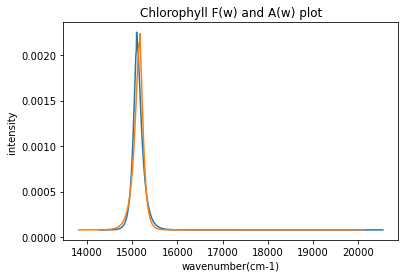

In [18]:
generate_spec_renger(15100, -37)

(array([14264.33635415, 14270.61953945, 14276.90272476, 14283.18591007,
        14289.46909537, 14295.75228068, 14302.03546599, 14308.3186513 ,
        14314.6018366 , 14320.88502191, 14327.16820722, 14333.45139252,
        14339.73457783, 14346.01776314, 14352.30094845, 14358.58413375,
        14364.86731906, 14371.15050437, 14377.43368967, 14383.71687498,
        14390.00006029, 14396.2832456 , 14402.5664309 , 14408.84961621,
        14415.13280152, 14421.41598682, 14427.69917213, 14433.98235744,
        14440.26554275, 14446.54872805, 14452.83191336, 14459.11509867,
        14465.39828397, 14471.68146928, 14477.96465459, 14484.2478399 ,
        14490.5310252 , 14496.81421051, 14503.09739582, 14509.38058113,
        14515.66376643, 14521.94695174, 14528.23013705, 14534.51332235,
        14540.79650766, 14547.07969297, 14553.36287828, 14559.64606358,
        14565.92924889, 14572.2124342 , 14578.4956195 , 14584.77880481,
        14591.06199012, 14597.34517543, 14603.62836073, 14609.91

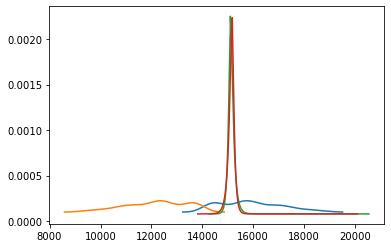

In [7]:
generate_spec_car2(14500, 450)


In [7]:
from scipy.interpolate import interp1d
def interpolate(x,y, x_new):
    """
    takes in x, y in list or np array.
    return x_new, y_new.
    """
    f = interp1d(x, y, kind='cubic', fill_value="extrapolate")
    y_new = f(x_new)
    return(np.array(x_new), np.array(y_new))
    

In [8]:
def calculate_spectral_overlap(x1,y1, x2,y2):
    """
    let's presume the x-axis are the same, starting from -3141.xxx to 3135.xxx
    x1 = x2
    
    first we shift the x2 by the diff.
    then interpolate x1/y1 and x2/y2 in range (-2000, 2000) #should be surfficient to cover their overlap.
    at last we calculate the intergral.
    
    the intergrand is the min of 2 function, times the delta x.
    the intergral is the spectral overlap.
    
    now consider shifting one of the spectra by the difference of their 0-0 transition frequency.
    say Chl 15,100
    while Lut 14,900
    
    the difference = 200 cm-1
    
    when calculating the intergral,
    the shifted spectra needs to interpolate to the same x-axis.

    Energy difference = energy2 - energy1
    the diff is added to x2.
    """
    
    #initializing intergral.
    #print("initializing intergral")
    intergral = 0

    #here we interpolate the x1,y1 function.
    x1_new, y1_new = interpolate(x1 ,y1, np.arange(14000,16000))
    
    #here we interpolate the x2,y2 function.
    x2_new, y2_new = interpolate(x2, y2, np.arange(14000,16000))
    
    for x_index, x in enumerate(x1_new):
        if x > 14100 and x < 15900:
            #start calculating intergral.
            intergrand = (x1_new[x_index+1] - x) * y1_new[x_index]*y2_new[x_index]
            intergral += intergrand
    
    return intergral
    

In [9]:
from scipy.constants import pi 
from scipy.constants import hbar #hbar in joules*sec.
from scipy.constants import speed_of_light

#Input:ps (time) , Output: cm-1 (energy)
def ps_to_cm(time_ps):
    return(1.0/(200.0*pi*speed_of_light*(time_ps*1E-12)))


#Input: cm-1 (energy), Output: ps (time)
def cm_to_ps(energy_cm):
    return((200.00*pi*speed_of_light*energy_cm*1E-12))


def build_k_matrix():
    """
    In this function we build the transfer matrix K, with N*N elements.
    As of the terminal emitter:
    
            LUT620 CLA610 CLA611 CLA612 CHL_POOL
    LUT620 
    CLA610
    CLA611
    CLA612
    CHL_POOL
    
    diagonal elements are: K_mn = -∑_(n≠m){k_mn} -k_m^d
    off-diagonal elements: K_mn = k_nm
    so K is a 4*4 matrix, we will assembly this by hand.
    
    the chl 1/Kd can be 4ns.
    the lifetime of the S2 state is as short as 200 fs, while that of the S1 state is as long as 10 ps 
    
    
    NOTE: FOR KINETICS WE CONVERT EVERTHING TO ps^-1
    
    """
    np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

    K = np.zeros((5,5)) #initialize K matrix
    #print("K matrix initialized")
    #print(K)
    
    kd_cla = 1/(4.0E3) #in ps-1
    kd_lut = 1/10 #in ps-1
    kd_pool = 5*kd_cla
    
    cla610_energy = 15100 #cm^-1
    cla611_energy = 15100 #cm^-1
    cla612_energy = 15100 #cm^-1
    lut620_energy = 14500 #cm^-1
    
    car_reorg_energy = 450 #cm^-1? adopted from Callum 
    chl_reorg_energy = -37 #cm^-1
    
    #k_lut620cla610 = 2*pi/hbar * coupling^2 * spec_overlap
    #Here we introduce the couplings for each pair.
    #Note the "Coupling_from_tresp/coupling_calc.py" calculates the TRESP couplings in cm-1. Convert to Joules: / 5.034E22 
    #Here we convert all to Joules:
    #hbar is in J*sec
    #      constant
    #K = ------------ * constant^2 * J  ; hence its unit is in sec-1
    #       J*sec

    data = np.load('../../Coupling_from_tresp/Hamiltonian_result8.npy') #Couplings in cm^-1
    J620_610 = np.average(data[:,0,1])
    J620_611 = np.average(data[:,0,2])
    J620_612 = np.average(data[:,0,3])
    J610_611 = np.average(data[:,1,2])
    J610_612 = np.average(data[:,1,3])
    J611_612 = np.average(data[:,2,3])

    
    #Here we calculate the spec overlap for each pair
    Aw620x, Aw620y, Fw620x, Fw620y = generate_spec_car2(lut620_energy, car_reorg_energy)
    Aw610x, Aw610y, Fw610x, Fw610y = generate_spec_renger(cla610_energy, chl_reorg_energy)
    Aw611x, Aw611y, Fw611x, Fw611y = generate_spec_renger(cla611_energy, chl_reorg_energy)
    Aw612x, Aw612y, Fw612x, Fw612y = generate_spec_renger(cla612_energy, chl_reorg_energy)

    
    #1 cm−1=1.986*10−23 J
    O620_610 = calculate_spectral_overlap(Fw620x, Fw620y, Aw610x, Aw610y) #energy from 620 to 610. use the Fw620, Aw610.
    O620_611 = calculate_spectral_overlap(Fw620x, Fw620y, Aw611x, Aw611y) #energy from 620 to 611. use the Fw620, Aw611.
    O620_612 = calculate_spectral_overlap(Fw620x, Fw620y, Aw612x, Aw612y) #energy from 620 to 612. use the Fw620, Aw612.
    O610_611 = calculate_spectral_overlap(Fw610x, Fw610y, Aw611x, Aw611y) #energy from 610 to 611. use the Fw610, Aw611.
    O610_612 = calculate_spectral_overlap(Fw610x, Fw610y, Aw612x, Aw612y) #energy from 610 to 612. use the Fw610, Aw612.
    O611_612 = calculate_spectral_overlap(Fw611x, Fw611y, Aw612x, Aw612y) #energy from 611 to 612. use the Fw611, Aw612.

    O610_620 = calculate_spectral_overlap(Aw620x, Aw620y, Fw610x, Fw610y)
    O611_620 = calculate_spectral_overlap(Aw620x, Aw620y, Fw611x, Fw611y)
    O612_620 = calculate_spectral_overlap(Aw620x, Aw620y, Fw612x, Fw612y)
    O611_610 = calculate_spectral_overlap(Aw610x, Aw610y, Fw611x, Fw611y)
    O612_610 = calculate_spectral_overlap(Aw610x, Aw610y, Fw612x, Fw612y)
    O612_611 = calculate_spectral_overlap(Aw611x, Aw611y, Fw612x, Fw612y)

    print(O620_610)
    print(O610_620)
    
    #here we assembly the matrix:
    #Here K elements are in cm, convert them into ps: use the cm_to_ps function
    #off-diagnal terms
    K[0,1] = cm_to_ps(2 * J620_610**2 * O620_610)
    K[0,2] = cm_to_ps(2 * J620_611**2 * O620_611)
    K[0,3] = cm_to_ps(2 * J620_612**2 * O620_612)
    K[1,2] = cm_to_ps(2 * J610_611**2 * O610_611)
    K[1,3] = cm_to_ps(2 * J610_612**2 * O610_612)
    K[2,3] = cm_to_ps(2 * J611_612**2 * O611_612)
    
    K[1,0] = cm_to_ps(2 * J620_610**2 * O610_620)
    K[2,0] = cm_to_ps(2 * J620_611**2 * O611_620)
    K[3,0] = cm_to_ps(2 * J620_612**2 * O612_620)
    K[2,1] = cm_to_ps(2 * J610_611**2 * O611_610)
    K[3,1] = cm_to_ps(2 * J610_612**2 * O612_610)
    K[3,2] = cm_to_ps(2 * J611_612**2 * O612_611)


    K[0,4] = 0 #lutein to pool
    K[1,4] = 1/5 #cla610 to pool
    K[2,4] = 1/5 #cla611 to pool
    K[3,4] = 1/5 #cla612 to pool
    
    K[4,0] = 0 #pool to lutein
    K[4,1] = 1/1 #pool to cla610
    K[4,2] = 1/1 #pool to cla611
    K[4,3] = 1/1 #pool to cla612
    
    #print(K)

    #print(K)
    
    #diagnal terms
    K[0,0] = -(K[0,1] + K[0,2] + K[0,3] + K[0,4]) - kd_lut
    K[1,1] = -(K[1,0] + K[1,2] + K[1,3] + K[1,4]) - kd_cla
    K[2,2] = -(K[2,0] + K[2,1] + K[2,3] + K[2,4]) - kd_cla
    K[3,3] = -(K[3,0] + K[3,1] + K[3,2] + K[3,4]) - kd_cla
    K[4,4] = -(K[4,0] + K[4,1] + K[4,2] + K[4,3]) - kd_pool

    return K

(array([13230.797, 13237.080, 13243.363, 13249.646, 13255.929, 13262.212,
        13268.496, 13274.779, 13281.062, 13287.345, 13293.628, 13299.912,
        13306.195, 13312.478, 13318.761, 13325.044, 13331.328, 13337.611,
        13343.894, 13350.177, 13356.460, 13362.743, 13369.027, 13375.310,
        13381.593, 13387.876, 13394.159, 13400.443, 13406.726, 13413.009,
        13419.292, 13425.575, 13431.858, 13438.142, 13444.425, 13450.708,
        13456.991, 13463.274, 13469.558, 13475.841, 13482.124, 13488.407,
        13494.690, 13500.974, 13507.257, 13513.540, 13519.823, 13526.106,
        13532.389, 13538.673, 13544.956, 13551.239, 13557.522, 13563.805,
        13570.089, 13576.372, 13582.655, 13588.938, 13595.221, 13601.505,
        13607.788, 13614.071, 13620.354, 13626.637, 13632.920, 13639.204,
        13645.487, 13651.770, 13658.053, 13664.336, 13670.620, 13676.903,
        13683.186, 13689.469, 13695.752, 13702.035, 13708.319, 13714.602,
        13720.885, 13727.168, 13733.45

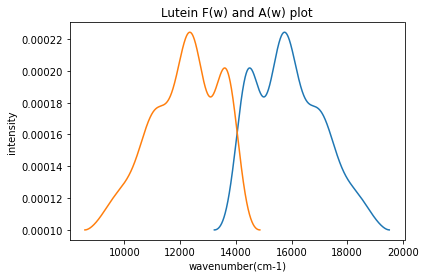

In [15]:
generate_spec_car2(14500, 450)

(array([14264.336, 14270.620, 14276.903, 14283.186, 14289.469, 14295.752,
        14302.035, 14308.319, 14314.602, 14320.885, 14327.168, 14333.451,
        14339.735, 14346.018, 14352.301, 14358.584, 14364.867, 14371.151,
        14377.434, 14383.717, 14390.000, 14396.283, 14402.566, 14408.850,
        14415.133, 14421.416, 14427.699, 14433.982, 14440.266, 14446.549,
        14452.832, 14459.115, 14465.398, 14471.681, 14477.965, 14484.248,
        14490.531, 14496.814, 14503.097, 14509.381, 14515.664, 14521.947,
        14528.230, 14534.513, 14540.797, 14547.080, 14553.363, 14559.646,
        14565.929, 14572.212, 14578.496, 14584.779, 14591.062, 14597.345,
        14603.628, 14609.912, 14616.195, 14622.478, 14628.761, 14635.044,
        14641.327, 14647.611, 14653.894, 14660.177, 14666.460, 14672.743,
        14679.027, 14685.310, 14691.593, 14697.876, 14704.159, 14710.443,
        14716.726, 14723.009, 14729.292, 14735.575, 14741.858, 14748.142,
        14754.425, 14760.708, 14766.99

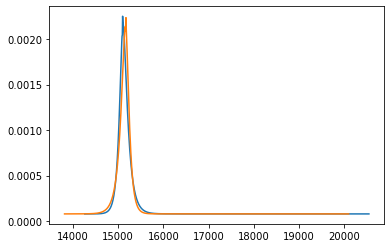

In [16]:
generate_spec_renger(15100, -37)

6.634034543505668e-05
0.00012306492877814813


array([[-0.103019, 0.000761, 0.000350, 0.001908, 0.000000],
       [0.001411, -0.371263, 0.072299, 0.097303, 0.200000],
       [0.000650, 0.072299, -2.631119, 2.357921, 0.200000],
       [0.003539, 0.097303, 2.357921, -2.659012, 0.200000],
       [0.000000, 1.000000, 1.000000, 1.000000, -3.001250]])

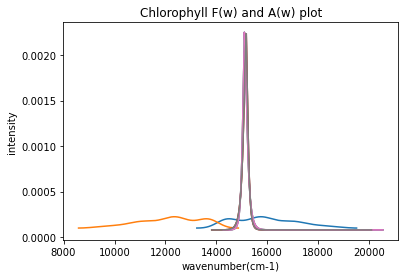

In [10]:
K = build_k_matrix()
np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})
K

In [11]:
from scipy.linalg import expm
from scipy.linalg import eig

def mat_inverse_value(mat):
    mat_new = np.zeros(mat.shape)
    
    for col_index, col in enumerate(mat):
        for element_index, element in enumerate(col):
            if element == 0:
                mat_new[col_index][element_index] = 0
            else:
                mat_new[col_index][element_index] = 1/element
    #print("the initial mat is:")
    #print(mat)
    #print("after the inversion:")
    #print(mat_new)
    
    return mat_new

def mean_life_time(K, P_0):
    """
    〈τ〉= -∑_i[λ^(-1)C^(-1)P(0)C]_i     
    """
    #here [0] is the eigenvalues, we use np.diag to convert it to diagonal matrix
    #where [1] is N eigenvectors from this N*N square matrix.
    Lambda_eigenvalue_matrix = np.diag(eig(K)[0]).real
    C_eigenvector_matrix = np.array(eig(K)[1]) #the "diagnalizing matrix"
    #print(Lambda_eigenvalue_matrix, C_eigenvector_matrix)
    tau = -np.sum(np.matmul(C_eigenvector_matrix, np.matmul(mat_inverse_value(Lambda_eigenvalue_matrix), np.matmul(np.linalg.inv(C_eigenvector_matrix), P_0 ))))
    
    return tau



def kinetics(K):
    """
    in this function we initialize the excitation in the system and do the kinetic simulation
    
    P(t)=exp⁡(Kt)P(0)  
    
    """
    
    #Initialize the system, with excitation equally distributed on all the CLA mol in the system, thus each CLA has 1/8 excitation.
    #Population list: [lut_pop, cla610_pop, cla_611_pop, cla612_pop, clapool_pop]
    P_0 = [0, 1/8, 1/8, 1/8, 5/8]
    
    Population_list=[]

    total_time = 3E3 #1ns = 1000ps, 1000 calculation points.
    
    for timepoint in range(0,int(total_time)):
        Population_list.append(np.dot(expm(K*timepoint),P_0))
    
    lt = mean_life_time(K,P_0)
    print("the mean lifetime is:")
    print(lt)
    
    return np.array(Population_list)


In [12]:
list_test = kinetics(K)
list_test.T[0].shape

the mean lifetime is:
313.2650994505718


(3000,)

In [23]:
def plot_population_time(lst):
    """
    suppose we have a population of 5 in the list.
    """
    plt.plot(np.arange(0,2500), lst[0][:2500], label="lut620")
    plt.plot(np.arange(0,2500), lst[1][:2500], label="cla610")
    plt.plot(np.arange(0,2500), lst[2][:2500], label="cla611")
    plt.plot(np.arange(0,2500), lst[3][:2500], label="cla612")
    plt.plot(np.arange(0,2500), lst[4][:2500], label="cla pool")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.xlabel("Time(ps)")
    plt.ylabel("Excitation probablity")
    return
    


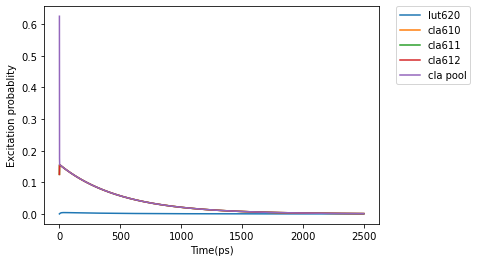

In [24]:
plot_population_time(list_test.T)

In [20]:
def plot_population_time_2(lst):
    """
    suppose we have a population of 5 in the list.
    """
    plt.plot(np.arange(0,50), lst[0][:50], label="Lut")
    plt.plot(np.arange(0,50), lst[1][:50], label="610")
    plt.plot(np.arange(0,50), lst[2][:50], label="611")
    plt.plot(np.arange(0,50), lst[3][:50], label="612")
    plt.plot(np.arange(0,50), lst[4][:50], label="Pool")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    return
    

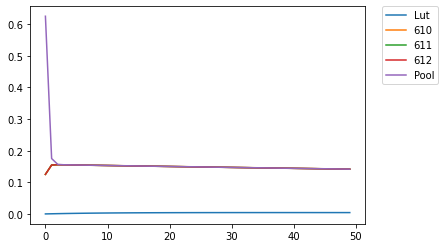

In [21]:
plot_population_time_2(list_test.T)

In [16]:
import numpy as np
data = np.load('../../Coupling_from_tresp/Hamiltonian_result7.npy') #Couplings in cm^-1
J620_610 = np.average(data[:,0,1])
J620_611 = np.average(data[:,0,2])
J620_612 = np.average(data[:,0,3])
J610_611 = np.average(data[:,1,2])
J610_612 = np.average(data[:,1,3])
J611_612 = np.average(data[:,2,3])

In [17]:
print(J620_610)
print(J620_611)
print(J620_612)
print(J610_611)
print(J610_612)
print(J611_612)

-5.5165823169286865
3.744425515251254
-8.736534769949484
-16.54922153765357
19.19886553591439
94.50985637115596
